In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [92]:
data=pd.read_csv('/content/Real_estate(5).csv',index_col='ID')
data.head(10)

,Location_Score,Num_Bathrooms,Num_Bedrooms,Num_Floors,Square_Feet,Price
ID,,,,,,
0,4.600024,1,3,1,130.195016,457514.732783
1,9.789575,1,5,3,215.049344,747398.279784
2,1.638810,1,3,1,201.886213,438805.869608
3,2.458074,3,2,3,107.199541,432105.524735
4,7.205655,3,3,2,167.165160,586589.362416
5,4.618435,3,2,2,61.361595,574795.306932
6,0.158132,2,3,2,238.635719,738134.678145
7,6.096310,2,2,3,271.771606,762589.629171
8,5.156594,1,1,2,211.293198,569188.941557


In [93]:
data.describe()
#here we need to scale the dataset as the values of square_feet,price varies a lot that can cause the linear model to get large prediction error

,Location_Score,Num_Bathrooms,Num_Bedrooms,Num_Floors,Square_Feet,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.164410,1.976000,2.958000,1.964000,174.640428,582209.629529
std,2.853489,0.820225,1.440968,0.802491,74.672102,122273.390345
min,0.004428,1.000000,1.000000,1.000000,51.265396,276892.470136
25%,2.760650,1.000000,2.000000,1.000000,110.319923,503080.344140
50%,5.206518,2.000000,3.000000,2.000000,178.290937,574724.113347
75%,7.732933,3.000000,4.000000,3.000000,239.031220,665942.301274
max,9.995439,3.000000,5.000000,3.000000,298.241199,960678.274291


In [94]:
data.isna().sum()
#here there is no null values

,0
Location_Score,0
Num_Bathrooms,0
Num_Bedrooms,0
Num_Floors,0
Square_Feet,0
Price,0


In [95]:
data.dtypes
#all data types are int/float

,0
Location_Score,float64
Num_Bathrooms,int64
Num_Bedrooms,int64
Num_Floors,int64
Square_Feet,float64
Price,float64


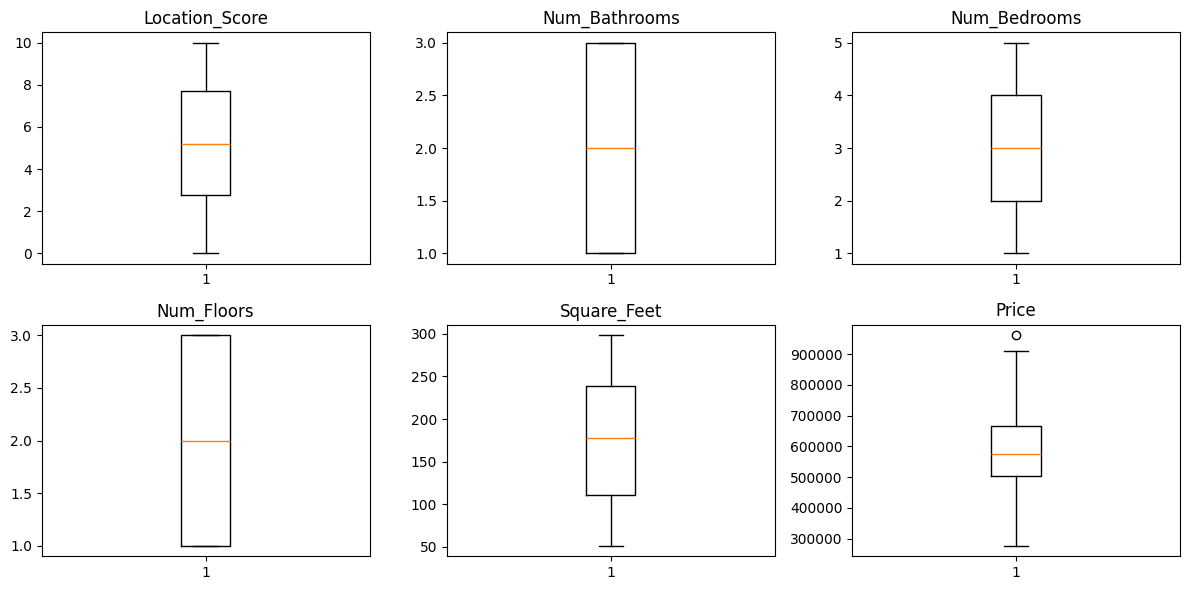

<Figure size 640x480 with 0 Axes>

In [96]:
fig,axes=plt.subplots(2,3,figsize=(4*3,3*2))
axes=axes.flatten()
for ax,col in zip(axes,data.columns):
  ax.boxplot(data[col].dropna())
  ax.set_title(col)
plt.tight_layout()
plt.show()
plt.savefig("no_outliers.png")

In [97]:
#to scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [99]:
X=data.drop(columns='Price',axis=1)
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [100]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE:",mean_absolute_error(y_test,y_pred))
print(f"MSE {mse}")
print(f"RMSE:{rmse}")


MAE: 57728.91437923432
MSE 4470916933.846154
RMSE:66864.91556747945


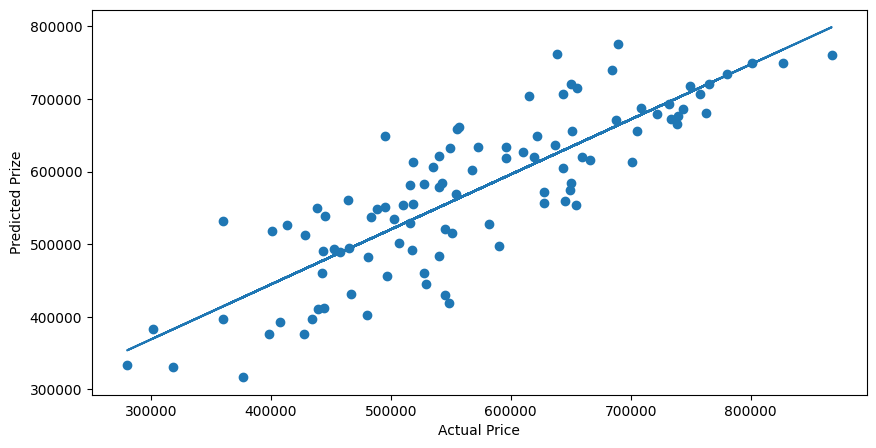

In [101]:
plt.figure(figsize=(10,5))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prize")
plt.scatter(y_test,y_pred)
m,c=np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+c)
plt.savefig("actual-predicted.png")

In [102]:
#As you can see for a normal predictions the predicted target value is way of the original value
#the mean absolute value of each error is greater than 57k
#Lets introduce some more features to check if it increases the accuracy of the model

In [103]:
data.info()



<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location_Score  500 non-null    float64
 1   Num_Bathrooms   500 non-null    int64  
 2   Num_Bedrooms    500 non-null    int64  
 3   Num_Floors      500 non-null    int64  
 4   Square_Feet     500 non-null    float64
 5   Price           500 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 27.3 KB


In [104]:
data['Bed_Floor_ratio']=data['Num_Bathrooms']/data['Num_Bedrooms']
data['twostore']=(data['Num_Floors']>1).astype(int)
data['totalrooms']=data['Num_Bathrooms']+data['Num_Bedrooms']
data['estimated_floor_area_of_each_room']=data['Square_Feet']/data['totalrooms']

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location_Score                     500 non-null    float64
 1   Num_Bathrooms                      500 non-null    int64  
 2   Num_Bedrooms                       500 non-null    int64  
 3   Num_Floors                         500 non-null    int64  
 4   Square_Feet                        500 non-null    float64
 5   Price                              500 non-null    float64
 6   Bed_Floor_ratio                    500 non-null    float64
 7   twostore                           500 non-null    int64  
 8   totalrooms                         500 non-null    int64  
 9   estimated_floor_area_of_each_room  500 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 43.0 KB


In [106]:
data.head()

,Location_Score,Num_Bathrooms,Num_Bedrooms,Num_Floors,Square_Feet,Price,Bed_Floor_ratio,twostore,totalrooms,estimated_floor_area_of_each_room
ID,,,,,,,,,,
0,4.600024,1,3,1,130.195016,457514.732783,0.333333,0,4,32.548754
1,9.789575,1,5,3,215.049344,747398.279784,0.200000,1,6,35.841557
2,1.638810,1,3,1,201.886213,438805.869608,0.333333,0,4,50.471553
3,2.458074,3,2,3,107.199541,432105.524735,1.500000,1,5,21.439908
4,7.205655,3,3,2,167.165160,586589.362416,1.000000,1,6,27.860860


In [107]:
X=data.drop(columns='Price',axis=1)
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [108]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MAE:",mean_absolute_error(y_test,y_pred))
print(f"MSE {mse}")
print(f"RMSE:{rmse}")


MAE: 57688.26342580218
MSE 4467897660.854627
RMSE:66842.33434624068


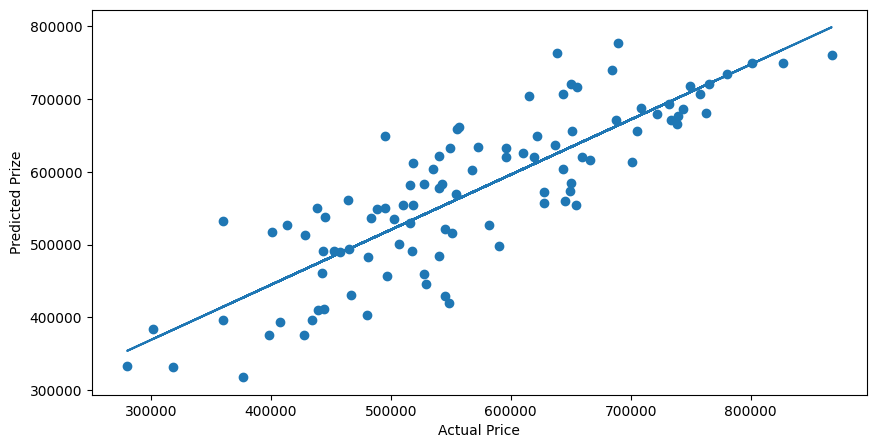

In [109]:
plt.figure(figsize=(10,5))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prize")
plt.scatter(y_test,y_pred)
m,c=np.polyfit(y_test,y_pred,1)
plt.plot(y_test,m*y_test+c)
plt.savefig("actual-predicted.png")

In [110]:
data.corr()["Price"].sort_values(ascending=False)

,Price
Price,1.000000
totalrooms,0.582037
Num_Bedrooms,0.563973
Square_Feet,0.558604
Num_Floors,0.177435
Num_Bathrooms,0.156689
twostore,0.124908
Location_Score,0.071326
estimated_floor_area_of_each_room,0.019479
Bed_Floor_ratio,-0.316656


In [114]:
results=pd.DataFrame({
    "Actual_Price":y_test.values,
    "Predicted_price":y_pred
})
results.to_csv('results.csv',index=False)

## So final conclusion from this training is that this dataset is not enough for the model or we can say the linear Regression model is failing to capture the non linear relation ship and will perform better with models like RandomForest,XGBoost etc combined with a better dataset with more information
